In [60]:
import findspark
findspark.init()

In [61]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [62]:
df = spark.read.csv("sgHomeSolarData -211021.csv", inferSchema = True, header = True)

df.show()

+---+-----------------+--------------+-----+----------------+
| id|IOTSensorlocation|   Measurement|Value|        readDate|
+---+-----------------+--------------+-----+----------------+
|  1|         13111111|   Temperature| 21.6|14/09/2021 15:39|
|  2|         13111111|   Temperature| 24.0|14/09/2021 16:40|
|  3|         13111111|   Temperature| 24.0|14/09/2021 16:55|
|  4|         13111111|   Temperature| 24.0|14/09/2021 16:56|
|  5|         13111111|   Temperature| 24.0|14/09/2021 16:56|
|  6|         13111111|   Temperature| 24.0|14/09/2021 16:57|
|  7|         13111111|   Temperature| 24.0|14/09/2021 17:01|
|  8|         13111111|   Temperature| 24.0|14/09/2021 17:02|
|  9|         13111111|   Temperature| 21.6|14/09/2021 17:07|
| 10|         13111111|   Temperature| 21.6|14/09/2021 17:09|
| 11|   UpstairsAircon|   Temperature| 18.0|18/09/2021 17:37|
| 12|       PVarrayGen|WattsGenetated|218.0|18/09/2021 17:37|
| 13|       HouseUsage|  WattsMetered|  8.0|18/09/2021 17:37|
| 14|   

In [64]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- IOTSensorlocation: string (nullable = true)
 |-- Measurement: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- readDate: string (nullable = true)



In [66]:
df.count()

420279

In [67]:
dfF1 = df.filter(df.IOTSensorlocation != "13111111") # remove 13111111

In [68]:
dfF2 = dfF1.filter(dfF1.Value > 0) # remove -1

In [69]:
dfF3 = dfF2.filter(dfF2.Measurement != "WattsGenetated") # remove Wattsgenetated

In [70]:
dfTemp = dfF3.filter(dfF3.Measurement == "Temperature") # Include Temperature

In [71]:
dfTemp.head()

Row(id=11, IOTSensorlocation='UpstairsAircon', Measurement='Temperature', Value=18.0, readDate='18/09/2021 17:37')

In [73]:
dfTemp.describe('Value').show()

+-------+------------------+
|summary|             Value|
+-------+------------------+
|  count|            105067|
|   mean|17.710822617948548|
| stddev|1.7172688415622126|
|    min|              12.0|
|    max|              21.5|
+-------+------------------+



In [74]:
dfGen = dfF3.filter(df.Measurement == "WattsGenerated")
dfGen.orderBy(dfGen.Value.desc()).show() # .asc(), .desc()

+------+-----------------+--------------+------+----------------+
|    id|IOTSensorlocation|   Measurement| Value|        readDate|
+------+-----------------+--------------+------+----------------+
|141996|       PVarrayGen|WattsGenerated|5085.0|25/09/2021 11:39|
|141888|       PVarrayGen|WattsGenerated|5084.0|25/09/2021 11:33|
| 46124|       PVarrayGen|WattsGenerated|5084.0|21/09/2021 11:48|
|141920|       PVarrayGen|WattsGenerated|5082.0|25/09/2021 11:35|
|220032|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|220028|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|141908|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:34|
|220036|       PVarrayGen|WattsGenerated|5080.0| 1/10/2021 11:59|
|141896|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:33|
|141864|       PVarrayGen|WattsGenerated|5078.0|25/09/2021 11:31|
|219532|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:29|
|219692|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:39|
|141792|  

In [76]:
dfGen.filter(dfGen.Value >= 5080).count()

9

In [77]:
dfF3.filter((dfF3.Measurement == "WattsGenerated") & (dfF3.Value >= 5080)).count()

9

In [78]:
dfGenValDate = dfGen.select('Value','readDate')
dfGenValDate.show()

+------+----------------+
| Value|        readDate|
+------+----------------+
|4560.0|19/09/2021 14:43|
|4570.0|19/09/2021 14:43|
|4396.0|19/09/2021 14:44|
|4596.0|19/09/2021 14:44|
|4432.0|19/09/2021 14:44|
|4538.0|19/09/2021 14:44|
|4556.0|19/09/2021 14:44|
|4658.0|19/09/2021 14:45|
|4744.0|19/09/2021 14:45|
|4438.0|19/09/2021 14:45|
|3970.0|19/09/2021 14:46|
|3832.0|19/09/2021 14:46|
|3526.0|19/09/2021 14:46|
|3916.0|19/09/2021 14:46|
|3312.0|19/09/2021 14:47|
|3730.0|19/09/2021 14:47|
|3944.0|19/09/2021 14:47|
|4138.0|19/09/2021 14:48|
|4080.0|19/09/2021 14:48|
|3971.0|19/09/2021 14:48|
+------+----------------+
only showing top 20 rows



### OrderBy

In [79]:
dfGen.orderBy(dfGen.Value.desc()).show()   #.asc()

+------+-----------------+--------------+------+----------------+
|    id|IOTSensorlocation|   Measurement| Value|        readDate|
+------+-----------------+--------------+------+----------------+
|141996|       PVarrayGen|WattsGenerated|5085.0|25/09/2021 11:39|
|141888|       PVarrayGen|WattsGenerated|5084.0|25/09/2021 11:33|
| 46124|       PVarrayGen|WattsGenerated|5084.0|21/09/2021 11:48|
|141920|       PVarrayGen|WattsGenerated|5082.0|25/09/2021 11:35|
|220032|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|220028|       PVarrayGen|WattsGenerated|5082.0| 1/10/2021 11:59|
|141908|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:34|
|220036|       PVarrayGen|WattsGenerated|5080.0| 1/10/2021 11:59|
|141896|       PVarrayGen|WattsGenerated|5080.0|25/09/2021 11:33|
|141864|       PVarrayGen|WattsGenerated|5078.0|25/09/2021 11:31|
|219532|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:29|
|219692|       PVarrayGen|WattsGenerated|5078.0| 1/10/2021 11:39|
|141792|  

## Spark SQL

In [80]:
df.createOrReplaceTempView("solarData")

In [81]:
sqlDf = spark.sql('SELECT Measurement , Value, readDate FROM solarData WHERE Measurement = "WattsGenerated" ORDER BY Value DESC')

In [82]:
sqlDf.show()

+--------------+------+----------------+
|   Measurement| Value|        readDate|
+--------------+------+----------------+
|WattsGenerated|5085.0|25/09/2021 11:39|
|WattsGenerated|5084.0|25/09/2021 11:33|
|WattsGenerated|5084.0|21/09/2021 11:48|
|WattsGenerated|5082.0|25/09/2021 11:35|
|WattsGenerated|5082.0| 1/10/2021 11:59|
|WattsGenerated|5082.0| 1/10/2021 11:59|
|WattsGenerated|5080.0|25/09/2021 11:34|
|WattsGenerated|5080.0| 1/10/2021 11:59|
|WattsGenerated|5080.0|25/09/2021 11:33|
|WattsGenerated|5078.0|25/09/2021 11:31|
|WattsGenerated|5078.0| 1/10/2021 11:29|
|WattsGenerated|5078.0| 1/10/2021 11:39|
|WattsGenerated|5078.0|25/09/2021 11:27|
|WattsGenerated|5078.0| 4/10/2021 11:47|
|WattsGenerated|5078.0|21/09/2021 11:51|
|WattsGenerated|5077.0|25/09/2021 11:19|
|WattsGenerated|5076.0|19/09/2021 15:15|
|WattsGenerated|5076.0|21/09/2021 11:48|
|WattsGenerated|5076.0|25/09/2021 11:27|
|WattsGenerated|5076.0|25/09/2021 11:33|
+--------------+------+----------------+
only showing top

In [138]:
rowZero = sqlDf.collect()[0]
print(rowZero)
# https://stackoverflow.com/questions/35243744/get-specific-row-from-spark-dataframe
#df.select("column").collect()[0][0]
sqlDf.select("Value").collect()[0][0]

Row(Measurement='WattsGenerated', Value=5085.0, readDate='25/09/2021 11:39')


5085.0

In [139]:
theDate = rowZero['readDate']
thevalue = rowZero['Value']
print(theDate, thevalue)


25/09/2021 11:39 5085.0


In [83]:
# http://localhost:4040/jobs/

In [84]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [85]:
pdfGen = dfGen.toPandas()

In [86]:
pdfGen

,id,IOTSensorlocation,Measurement,Value,readDate
0,2124,PVarrayGen,WattsGenerated,4560.0,19/09/2021 14:43
1,2128,PVarrayGen,WattsGenerated,4570.0,19/09/2021 14:43
2,2132,PVarrayGen,WattsGenerated,4396.0,19/09/2021 14:44
3,2136,PVarrayGen,WattsGenerated,4596.0,19/09/2021 14:44
4,2140,PVarrayGen,WattsGenerated,4432.0,19/09/2021 14:44
...,...,...,...,...,...
48851,420261,PVarrayGen,WattsGenerated,4802.0,10/10/2021 11:25
48852,420265,PVarrayGen,WattsGenerated,4810.0,10/10/2021 11:25
48853,420269,PVarrayGen,WattsGenerated,4846.0,10/10/2021 11:26
48854,420273,PVarrayGen,WattsGenerated,4866.0,10/10/2021 11:26


In [90]:
pdfGen.dtypes

id                     int32
IOTSensorlocation     object
Measurement           object
Value                float64
readDate              object
dtype: object

In [ ]:
# filter on date

In [92]:
pdfGen['readDate'] = pd.to_datetime(pdfGen['readDate'], dayfirst = True)

In [93]:
pdfGen.dtypes

id                            int32
IOTSensorlocation            object
Measurement                  object
Value                       float64
readDate             datetime64[ns]
dtype: object

In [101]:
now = datetime.now()

In [116]:
# a single day
#dateMask = ((pdfGen['readDate'] > '20/09/2021 15:00') & (pdfGen['readDate'] < now))
dateMask = ((pdfGen['readDate'] > '25/09/2021 00:00') & (pdfGen['readDate'] < '25/09/2021 23:59'))

In [117]:
pdfGenDay = pdfGen.loc[dateMask]

[Text(0.5, 0, 'date'),
 Text(0, 0.5, 'Generation Watts'),
 Text(0.5, 1.0, 'Measurement of generation for 25/09/21')]

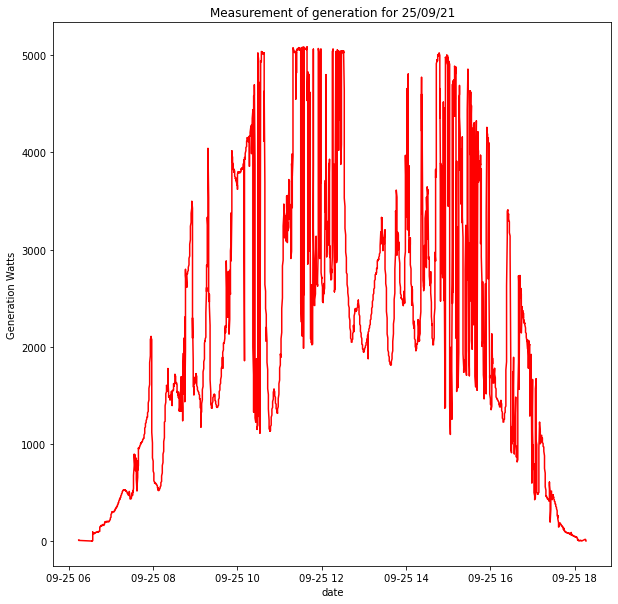

In [121]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(pdfGenDay['readDate'],pdfGenDay['Value'], color ='red')
ax.set(xlabel = "date", ylabel= "Generation Watts",
      title = "Measurement of generation for 25/09/21")

In [120]:
plt.show()

In [59]:
spark.stop()

In [115]:
sqlDf2 = spark.sql('SELECT readDate FROM solarData WHERE Measurement = "WattsGenerated" ORDER BY Value DESC LIMIT 1')
sqlDf2.show()

+----------------+
|        readDate|
+----------------+
|25/09/2021 11:39|
+----------------+



In [109]:
sqlDf2.loc[0][2]

AttributeError: 'DataFrame' object has no attribute 'loc'